<a href="https://colab.research.google.com/github/sreenu1232/Nxtwave/blob/main/nxtwave1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Surface Area ≈ 0.00007
Edge Length ≈ 6.71504


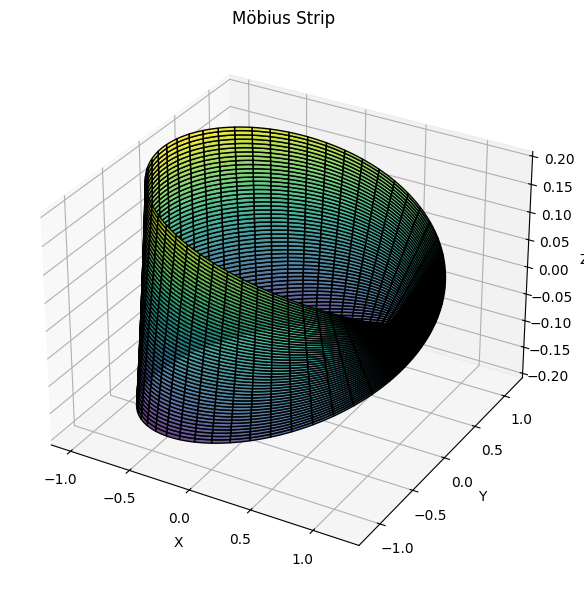

In [4]:
# Ensure scipy is installed
!pip install scipy

# Correct the import statement
import numpy as np
from scipy.integrate import simpson  # Import simpson directly from scipy.integrate
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R=1.0, w=0.3, n=200):
        self.R = R
        self.w = w
        self.n = n
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)
        self.X, self.Y, self.Z = self._compute_surface()

    def _compute_surface(self):
        U, V = self.U, self.V
        X = (self.R + V * np.cos(U / 2)) * np.cos(U)
        Y = (self.R + V * np.cos(U / 2)) * np.sin(U)
        Z = V * np.sin(U / 2)
        return X, Y, Z

    def compute_surface_area(self):
        # Compute the Jacobian determinant numerically
        Xu = np.gradient(self.X, axis=1)
        Yu = np.gradient(self.Y, axis=1)
        Zu = np.gradient(self.Z, axis=1)

        Xv = np.gradient(self.X, axis=0)
        Yv = np.gradient(self.Y, axis=0)
        Zv = np.gradient(self.Z, axis=0)

        # Cross product of partial derivatives
        cross = np.cross(np.stack((Xu, Yu, Zu), axis=2),
                         np.stack((Xv, Yv, Zv), axis=2))
        dA = np.linalg.norm(cross, axis=2)

        # Integrate over the surface using Simpson's Rule
        # Use simpson instead of simps
        area = simpson(simpson(dA, self.v), self.u)
        return area

    def compute_edge_length(self):
        # Trace edge at v = ±w/2 and compute length
        edge1 = np.array([
            (self.X[0, i], self.Y[0, i], self.Z[0, i])
            for i in range(self.n)
        ])
        edge2 = np.array([
            (self.X[-1, i], self.Y[-1, i], self.Z[-1, i])
            for i in range(self.n)
        ])
        # Loop around edge1
        length1 = sum(euclidean(edge1[i], edge1[i + 1]) for i in range(self.n - 1))
        length1 += euclidean(edge1[-1], edge1[0])  # Close the loop

        # Loop around edge2
        length2 = sum(euclidean(edge2[i], edge2[i + 1]) for i in range(self.n - 1))
        length2 += euclidean(edge2[-1], edge2[0])  # Close the loop

        return (length1 + length2) / 2  # Average both edge loops

    def plot(self):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.X, self.Y, self.Z, cmap='viridis', edgecolor='k', alpha=0.8)
        ax.set_title("Möbius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()

# Run example
if __name__ == "__main__":
    mobius = MobiusStrip(R=1.0, w=0.4, n=300)
    print(f"Surface Area ≈ {mobius.compute_surface_area():.5f}")
    print(f"Edge Length ≈ {mobius.compute_edge_length():.5f}")
    mobius.plot()